# TASK : INSTAGRAM REACH FORECASTING

# About the Dataset

The Instagram-Reach dataset contains historical data of Instagram reach over a specific period. It includes the date and the corresponding Instagram reach value for each day.

The dataset covers the time period from April 1, 2022, to March 31, 2023. Each row in the dataset represents a single day's data, with the date in the format of "YYYY-MM-DD" and the Instagram reach value.

The Instagram reach is a measure of the total number of unique users who were exposed to a particular Instagram account's content during a given time period. It provides insights into the audience size and engagement level of the account.

## Dataset Link : https://drive.google.com/drive/folders/1ENp-WBR4wtYsOgcAVj3c3Kxv8Bt-6NWH?usp=sharing

# Objective of the project

Instagram reach forecasting is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors. For content creators and anyone using Instagram professionally, predicting the reach can be valuable for planning and optimizing their social media strategy. By understanding how their content is performing, creators can make informed decisions about when to publish, what types of content to create, and how to engage their audience. It can lead to increased engagement, better performance metrics, and ultimately, greater success on the platform.

# Data Preparation

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Loading the Datset

df = pd.read_csv('Instagram-Reach.csv')
df

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


In [ ]:
# First 5 rows
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [ ]:
# Last 5 rows
df.tail()

,Date,Instagram reach
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490
364,2023-03-31T00:00:00,22014


In [ ]:
# Dimensions of the dataset
df.shape

(365, 2)

In [ ]:
# Columns of the dataset
df.columns

Index(['Date', 'Instagram reach'], dtype='object')

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


## Observations:
1. This Dataset contains 365 rows and 2 columns.
2. The Date column is of object type which need to be converted to datetime.
3. The Instagram reach column is of float64 type.
4. There are no null values


# Data Preprocessing

In [ ]:
# Checking for Datatypes
df.dtypes

Date               object
Instagram reach     int64
dtype: object

## Data Types Conversion

In [ ]:
# Converting Datatypes
df['Date'] = pd.to_datetime(df['Date'])

# Setting the Date as index
df.set_index('Date', inplace=True)

In [ ]:
# showing first 5 rows
df.head()

,Instagram reach
Date,
2022-04-01,7620
2022-04-02,12859
2022-04-03,16008
2022-04-04,24349
2022-04-05,20532


In [ ]:
# Checking for Duplicates
df.duplicated().sum() # no duplicate values

0

In [ ]:
# Checking for Null Values
df.isnull().sum() # no missing values

Instagram reach    0
dtype: int64

In [ ]:
# Showing first and last value of index
print(df.index.min())
print(df.index.max())

2022-04-01 00:00:00
2023-03-31 00:00:00


# Plotting the trend of Instagram Reach Over Time

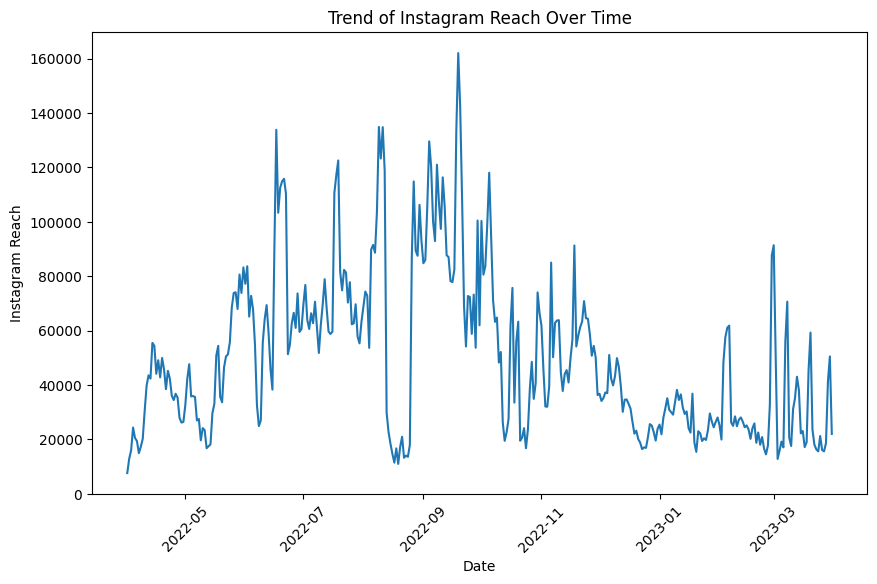

In [ ]:
# Plotting the trend of Instagram reach over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Instagram reach'])
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Trend of Instagram Reach Over Time')
plt.xticks(rotation=45)
plt.show()

# Split the data into train and test

In [ ]:
# Splitting the data into training and testing sets

train_data = df.loc[:'2022-12-31']  # Using data until December 2022 for training
test_data = df.loc['2023-01-01':]  # Using data from January 2023 for testing


In [ ]:
print(train_data.shape)
print(test_data.shape)

(275, 1)
(90, 1)


In [ ]:
print(train_data.tail())
print(test_data.head())

            Instagram reach
Date                       
2022-12-27            25612
2022-12-28            25070
2022-12-29            22686
2022-12-30            19555
2022-12-31            23887
            Instagram reach
Date                       
2023-01-01            25451
2023-01-02            21871
2023-01-03            28045
2023-01-04            31426
2023-01-05            35156


# Plotting the train and test data

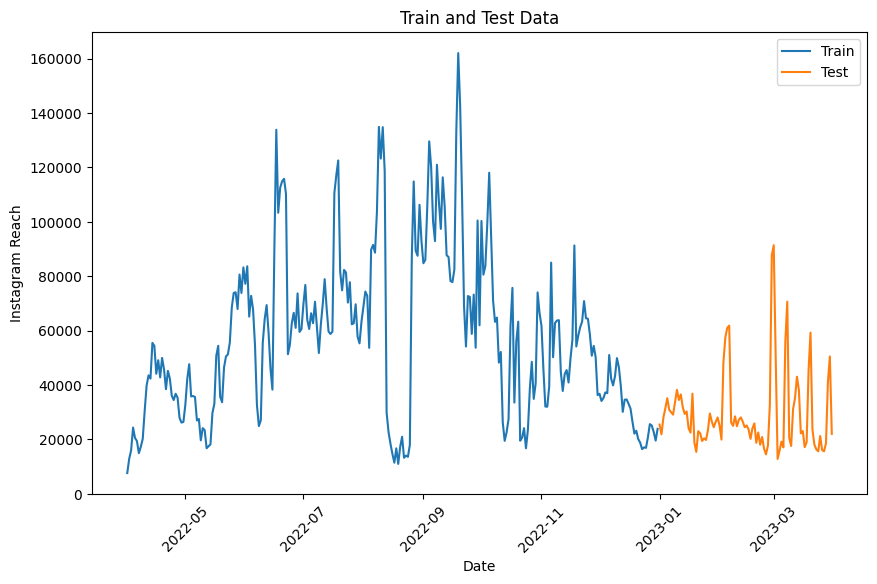

In [ ]:
# Plotting the training and testing data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Instagram reach'], label='Train')
plt.plot(test_data.index, test_data['Instagram reach'], label='Test')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Train and Test Data')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ARIMA (AutoRegressive Integrated Moving Average) Model

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting model. It combines autoregressive (AR), differencing (I), and moving average (MA) components to capture the temporal patterns and dependencies in the data. ARIMA models are widely used for time series forecasting in various domains, including economics, finance, and demand forecasting. They offer a flexible and powerful framework to capture and predict patterns in time-dependent data.

1. It takes 3 parameters (p,d,q)

2. Short Description of each parameter:

 *   p (autoregressive order) represents the number of lagged observations to
include in the model. It captures the relationship between the current observation and past observations.

 *   d (differencing order) represents the number of times differencing is applied to make the time series stationary by removing trends and seasonality.

 *   q (moving average order) represents the number of lagged forecast errors to include in the model. It captures the dependency between the current observation and past forecast errors.

3. I am taking Arima model with p = 1,  d = 1 and q = 1.

In [ ]:
# Create and fit the ARIMA model
model = ARIMA(train_data['Instagram reach'], order=(1, 1, 1))  # ARIMA(p, d, q) order
model_fit = model.fit()

In [ ]:
# Forecast Instagram reach
forecast = model_fit.forecast(steps=len(test_data))
forecast

2023-01-01    25966.818435
2023-01-02    27643.442400
2023-01-03    28995.035343
2023-01-04    30084.607914
2023-01-05    30962.955491
                  ...     
2023-03-27    34615.432568
2023-03-28    34615.432586
2023-03-29    34615.432601
2023-03-30    34615.432613
2023-03-31    34615.432623
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

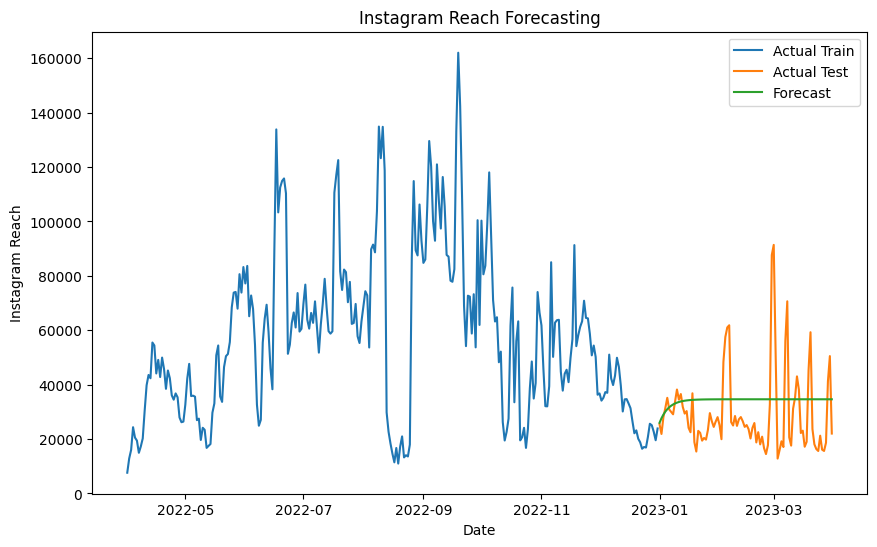

In [ ]:
# Plot the actual data along with forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Instagram reach'], label='Actual Train')
plt.plot(test_data.index, test_data['Instagram reach'], label='Actual Test')
plt.plot(test_data.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach Forecasting')
plt.legend()
plt.show()

# Showing the Actual and Predicted Instagram Reach Values of Random 20 Days.

In [ ]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({
    'Actual_Instagram_Reach': test_data['Instagram reach'].values,
    'Predicted_Instagram_Reach': forecast
}, index=test_data.index)

# Display the results DataFrame
results_df.sample(20)

,Actual_Instagram_Reach,Predicted_Instagram_Reach
Date,,
2023-01-10,38209,33371.952846
2023-03-21,23662,34615.432314
2023-01-25,19793,34566.365333
2023-03-14,38135,34615.431084
2023-01-09,33687,33072.920864
2023-01-13,31826,33964.000077
2023-01-20,15411,34471.307039
2023-01-16,24114,34274.161009
2023-02-25,14482,34615.371073


# Summary of the Project

This project successfully developed a forecasting system to predict Instagram reach, enabling informed decision-making for social media strategies. It incorporated time series analysis, feature engineering, and model selection to achieve accurate predictions, which were visualized and communicated effectively to stakeholders. Ongoing monitoring ensures the model's relevance and accuracy over time.

This project equips stakeholders with actionable insights and forecasts, facilitating data-driven decision-making in Instagram reach management and strategy planning.